<h3 style="text-align: center;"><b>Домашнее задание. Решение ML-задачи и Kaggle.</b></h3>
<p>Султанов Равиль</p>

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [5]:
data.tail()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
5281,19,75.90,1375.6,Female,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0


In [6]:
data[500:506]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
500,65,105.50,6985.65,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
501,52,104.45,5481.25,Male,1,Yes,No,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),0
502,1,24.80,24.8,Male,0,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),1
503,1,73.00,73,Female,1,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1
504,37,91.20,3382.3,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),0
505,37,80.05,3019.1,Female,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,One year,No,Electronic check,0


In [7]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [8]:
# количетсво null объектов в каждом столбце
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Всё бы ничего, но пока я занимался анализом данных, заметил, что некоторые значения их столбца TotalSpent не преобразуются во float. Всё потому, что в некоторых ячейках сожержится строка из одного пробела.

Поэтому я решил дополнительно перепроверить всю таблицу на наличие таких строк, а также пустых строк.

In [10]:
def isfl(s):
  try:
    fl = float(s)
    return True
  except ValueError:
    return False

In [11]:
data[num_cols].applymap(lambda x: not isfl(x)).sum()

ClientPeriod       0
MonthlySpending    0
TotalSpent         9
dtype: int64

In [12]:
(data==' ').sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [13]:
(data=='').sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Таких строк не много, и чтобы не портить модель додумывая значения, я решил просто удалить эти строки

In [14]:
data = data.replace(' ', np.nan)
data.replace()
data = data.dropna()

Проверим

In [15]:
(data==' ').sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [16]:
numeric_data = data[num_cols].astype(float)
categorial_data = data[cat_cols]

Преобразовали значения в колонках с числами из строк *str* в числа *float*

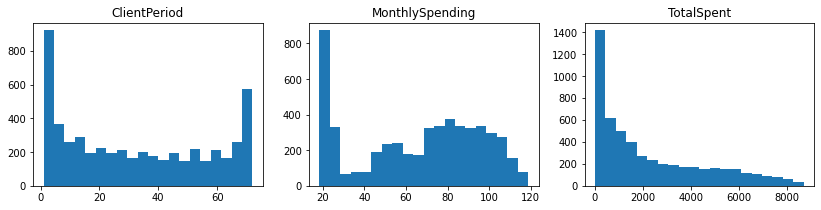

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(14,3))
ax = ax.ravel()
for i,col in enumerate(num_cols):
  ax[i].hist(numeric_data[col], bins=20)
  ax[i].set_title(col)
fig.show()

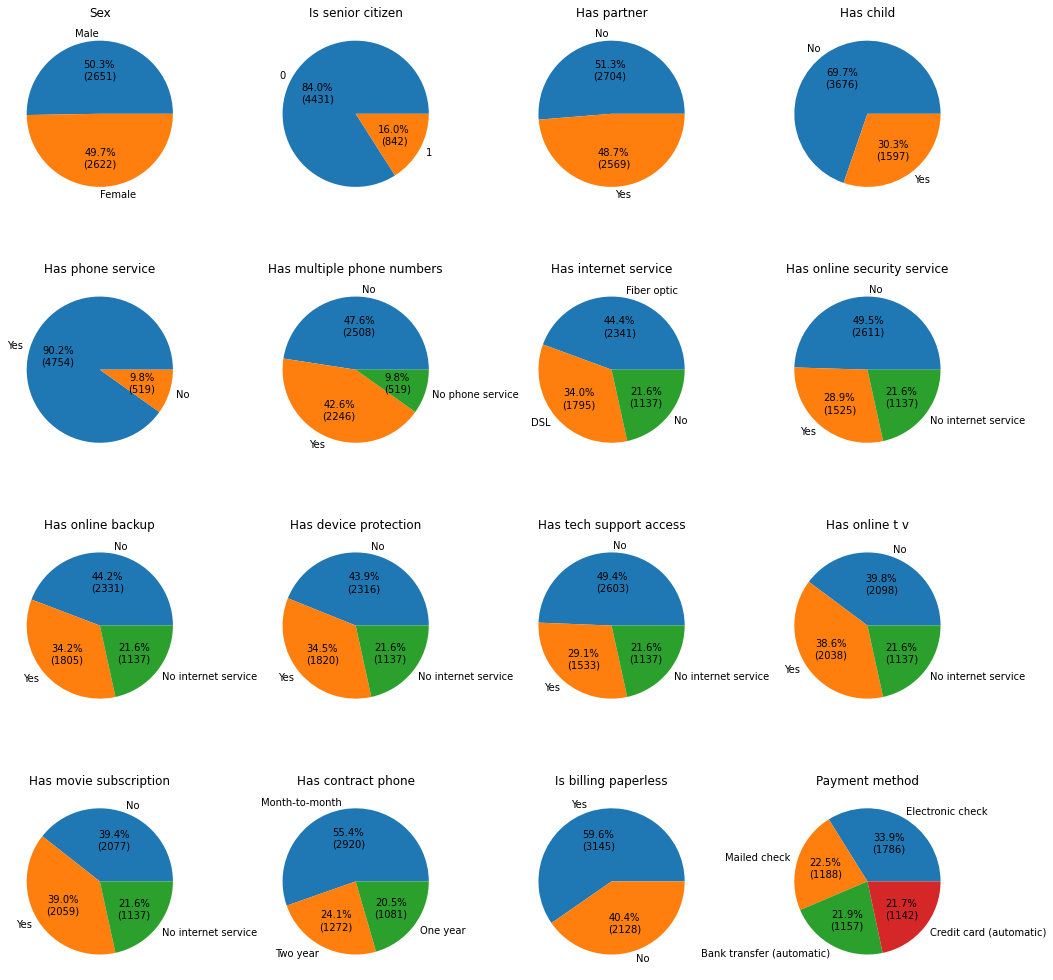

In [18]:
import re
def func(pct, allvalues):
  absolute = int(np.around(pct * np.sum(allvalues) / 100))
  return "{:.1f}%\n({:d})".format(pct, absolute)  
fig, ax = plt.subplots(4, 4, figsize=(12,12))
ax = ax.ravel()
for i,col in enumerate(cat_cols):
  unic_vals = []
  #for 
  data.value_counts(['Sex']).index.tolist()
  col_spl =  ' '.join(re.findall('[A-Z][^A-Z]*', col))
  cat_labels = np.array(data.value_counts([col]).index.tolist()).flatten()
  ax[i].pie(categorial_data.value_counts([col]),
            radius=1,
            labels=cat_labels,
            autopct = lambda pct: func(pct, categorial_data.value_counts([col])))
  ax[i].set_title(col_spl.lower().capitalize())
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.2, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)
fig.show()

В каждом сегменте указано процентное соотношение и количество соответсвующих людей.

Классы более-менее сбалансированы

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [19]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [20]:
dummy_features = pd.get_dummies(categorial_data)

In [21]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X_origin = pd.concat([numeric_data, categorial_data], axis=1)
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55.0,19.50,1026.35,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,72.0,25.85,1872.20,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,1.0,75.90,75.90,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,32.0,79.30,2570.00,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,60.0,115.25,6758.45,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0


In [22]:
y = data[target_col]

In [23]:
X.shape, X_origin.shape

((5273, 45), (5273, 19))

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [25]:
#Сs = [100, 10, 1, 0.1, 0.01, 0.001]

In [26]:
lof_reg_cv = LogisticRegressionCV(cv=5, scoring='roc_auc', refit=True).fit(X_scaled, y)

In [27]:
lof_reg_cv.Cs

10

In [28]:
lof_reg_cv.score(X_scaled, y)

0.8487947516115559

In [29]:
data_test = pd.read_csv('./test.csv')
data_test

In [30]:
data_test[num_cols].applymap(lambda x: not isfl(x)).sum()

In [31]:
(data_test==' ').sum()

In [32]:
data_test = data_test.replace(' ', np.nan)
data_test.replace()
data_test = data_test.dropna()
data_test

In [33]:
numeric_data_test = data_test[num_cols].astype(float)
categorial_data_test = data_test[cat_cols]

In [114]:
dummy_features_test = pd.get_dummies(categorial_data_test)

In [115]:
X_test = pd.concat([numeric_data_test, dummy_features_test], axis=1)
X_test_origin = pd.concat([numeric_data_test, categorial_data_test], axis=1)
X_test.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,42.0,56.10,2386.85,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0
1,29.0,98.50,3004.15,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
2,9.0,76.25,684.85,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,67.0,74.00,4868.40,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0
4,71.0,20.10,1389.60,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0


In [116]:
X_test_transformed = scaler.transform(X_test)
X_test_transformed

array([[ 0.38918725, -0.29351304,  0.04207492, ...,  1.90193007,
        -0.7156732 , -0.53927736],
       [-0.1407243 ,  1.11162138,  0.31415719, ..., -0.52578169,
         1.3972858 , -0.53927736],
       [-0.95597282,  0.37425721, -0.70810169, ..., -0.52578169,
         1.3972858 , -0.53927736],
       ...,
       [-1.24130981,  0.87798464, -0.93438881, ..., -0.52578169,
         1.3972858 , -0.53927736],
       [-0.54834856,  0.80010573, -0.29557067, ..., -0.52578169,
         1.3972858 , -0.53927736],
       [ 1.61206004,  0.02131661,  1.00278141, ..., -0.52578169,
        -0.7156732 , -0.53927736]])

In [117]:
y_test_reg = lof_reg_cv.predict_proba(X_test_transformed)

In [124]:
y_test_reg

array([[0.96282277, 0.03717723],
       [0.26505155, 0.73494845],
       [0.31639534, 0.68360466],
       ...,
       [0.24846709, 0.75153291],
       [0.35643021, 0.64356979],
       [0.99020813, 0.00979187]])

In [ ]:
from google.colab import files

In [133]:
y_test_reg[:,1]

array([0.03717723, 0.73494845, 0.68360466, ..., 0.75153291, 0.64356979,
       0.00979187])

Данный результат можно использовать в качестве попытки на Kaggle

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

**Попробуем сначала CatBoost**

In [36]:
!pip install catboost

In [37]:
import catboost

In [38]:
X_train_origin, X_test_origin, y_train, y_test = train_test_split(X_origin.values, y.values)

In [39]:
categorical_indices = np.arange(3,len(feature_cols))

In [40]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=categorical_indices)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

Learning rate set to 0.081063
0:	learn: 0.6416886	total: 66.8ms	remaining: 13.3s
1:	learn: 0.6003950	total: 94.1ms	remaining: 9.31s
2:	learn: 0.5662426	total: 117ms	remaining: 7.67s
3:	learn: 0.5414685	total: 129ms	remaining: 6.31s
4:	learn: 0.5213246	total: 141ms	remaining: 5.48s
5:	learn: 0.5043229	total: 154ms	remaining: 4.99s
6:	learn: 0.4917720	total: 167ms	remaining: 4.61s
7:	learn: 0.4770286	total: 183ms	remaining: 4.39s
8:	learn: 0.4650089	total: 202ms	remaining: 4.28s
9:	learn: 0.4551455	total: 219ms	remaining: 4.17s
10:	learn: 0.4485404	total: 231ms	remaining: 3.97s
11:	learn: 0.4414649	total: 245ms	remaining: 3.84s
12:	learn: 0.4380991	total: 252ms	remaining: 3.63s
13:	learn: 0.4328085	total: 267ms	remaining: 3.54s
14:	learn: 0.4285871	total: 278ms	remaining: 3.43s
15:	learn: 0.4248349	total: 291ms	remaining: 3.35s
16:	learn: 0.4212686	total: 305ms	remaining: 3.28s
17:	learn: 0.4183853	total: 319ms	remaining: 3.23s
18:	learn: 0.4162435	total: 331ms	remaining: 3.15s
19:	learn

In [152]:
from sklearn.metrics import roc_auc_score, roc_curve

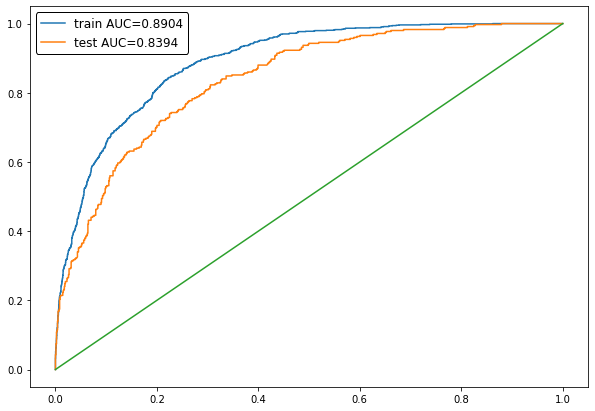

In [42]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

А теперь попробуем кросс-валидацию с подбором параметров для CatBoost

In [153]:
parameters = {'n_estimators' : np.arange(10, 50, 1),
              'learning_rate' : np.logspace(-2, -1, 10, base=10)}

model = catboost.CatBoostClassifier(cat_features=categorical_indices,
                                    eval_metric='AUC')

grid_search_result = model.grid_search(parameters, 
                                       X=X_origin, 
                                       y=y,
                                       cv=5, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
0:	test: 0.8139383	best: 0.8139383 (0)	total: 8.71ms	remaining: 340ms
1:	test: 0.8315000	best: 0.8315000 (1)	total: 16.3ms	remaining: 309ms
2:	test: 0.8429129	best: 0.8429129 (2)	total: 24.6ms	remaining: 304ms
3:	test: 0.8437755	best: 0.8437755 (3)	total: 33ms	remaining: 297ms
4:	test: 0.8454049	best: 0.8454049 (4)	total: 40.7ms	remaining: 285ms
5:	test: 0.8492092	best: 0.8492092 (5)	total: 54.1ms	remaining: 306ms
6:	test: 0.8514799	best: 0.8514799 (6)	total: 65.9ms	remaining: 311ms
7:	test: 0.8509688	best: 0.8514799 (6)	total: 73.6ms	remaining: 295ms
8:	test: 0.8489315	best: 0.8514799 (6)	total: 81.2ms	remaining: 280ms
9:	test: 0.8502512	best: 0.8514799 (6)	total: 88.9ms	remaining: 267ms
10:	test: 0.8509565	best: 0.8514799 (6)	total: 96.4ms	remaining: 254ms
11:	test: 0.8502979	best: 0.8514799 (6)	total: 104ms	remaining: 243ms
12:	test: 0.8522664	best: 0.8522664 (12)	total: 112ms	remaining: 232ms
13:	test: 0.8520108	be

In [154]:
grid_search_result['params']

{'iterations': 40, 'learning_rate': 0.0774263682681127}

In [155]:
best_n_estim = grid_search_result['params']['iterations']
best_learn_rate = grid_search_result['params']['learning_rate']

In [156]:
best_n_estim, best_learn_rate

(40, 0.0774263682681127)

In [157]:
boosting_model = catboost.CatBoostClassifier(n_estimators=best_n_estim,
                                             learning_rate=best_learn_rate,
                                             cat_features=categorical_indices)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

0:	learn: 0.6651353	total: 6.07ms	remaining: 237ms
1:	learn: 0.6400109	total: 11.6ms	remaining: 220ms
2:	learn: 0.6179154	total: 17.1ms	remaining: 211ms
3:	learn: 0.5983739	total: 21.9ms	remaining: 197ms
4:	learn: 0.5812889	total: 29ms	remaining: 203ms
5:	learn: 0.5663869	total: 39.1ms	remaining: 221ms
6:	learn: 0.5533591	total: 44.1ms	remaining: 208ms
7:	learn: 0.5411905	total: 49.5ms	remaining: 198ms
8:	learn: 0.5299564	total: 54.5ms	remaining: 188ms
9:	learn: 0.5204789	total: 59.4ms	remaining: 178ms
10:	learn: 0.5118038	total: 64.3ms	remaining: 170ms
11:	learn: 0.5043462	total: 69.8ms	remaining: 163ms
12:	learn: 0.4971079	total: 75.5ms	remaining: 157ms
13:	learn: 0.4903122	total: 80.7ms	remaining: 150ms
14:	learn: 0.4842379	total: 85.6ms	remaining: 143ms
15:	learn: 0.4784829	total: 90.8ms	remaining: 136ms
16:	learn: 0.4736235	total: 96ms	remaining: 130ms
17:	learn: 0.4688823	total: 101ms	remaining: 124ms
18:	learn: 0.4638858	total: 106ms	remaining: 117ms
19:	learn: 0.4591745	total: 

In [169]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

ValueError: ignored

In [161]:
data_test = pd.read_csv('./test.csv')
data_test

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71,105.15,7555,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
1757,13,20.85,272.35,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1758,2,91.45,171.45,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
1759,19,89.10,1620.8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check


In [162]:
data_test[num_cols].applymap(lambda x: not isfl(x)).sum()

ClientPeriod       0
MonthlySpending    0
TotalSpent         2
dtype: int64

In [163]:
(data_test==' ').sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  2
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [166]:
# data_test = data_test.replace(' ', np.nan)
data_test = data_test.replace(' ', 0)
data_test.replace()
data_test = data_test.dropna()
data_test

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71,105.15,7555,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
1757,13,20.85,272.35,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1758,2,91.45,171.45,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
1759,19,89.10,1620.8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check


In [167]:
numeric_data_test = data_test[num_cols].astype(float)
categorial_data_test = data_test[cat_cols]

In [168]:
dummy_features_test = pd.get_dummies(categorial_data_test)

In [171]:
X_test = pd.concat([numeric_data_test, dummy_features_test], axis=1)
X_test_origin = pd.concat([numeric_data_test, categorial_data_test], axis=1)
X_test_origin.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42.0,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29.0,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9.0,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67.0,74.00,4868.40,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71.0,20.10,1389.60,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [172]:
X_test_origin

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42.0,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29.0,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9.0,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67.0,74.00,4868.40,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71.0,20.10,1389.60,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71.0,105.15,7555.00,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
1757,13.0,20.85,272.35,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1758,2.0,91.45,171.45,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
1759,19.0,89.10,1620.80,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check


In [173]:
y_test_pred = boosting_model.predict_proba(X_test_origin)[:, 1]

Данная модель (CatBoostClassifier) пока показала лучший результат

**А теперь опробуем XGBoost** (благо я про него вспомнил)

In [146]:
!pip install xgboost

In [147]:
import xgboost

In [148]:
xgboosting_model = xgboost.XGBClassifier(n_estimators=500)

xgboosting_model.fit(X_scaled, y)

y_train_predicted = xgboosting_model.predict_proba(X_scaled)[:, 1]
y_test_predicted = xgboosting_model.predict_proba(scaler.transform(X_test))[:, 1]

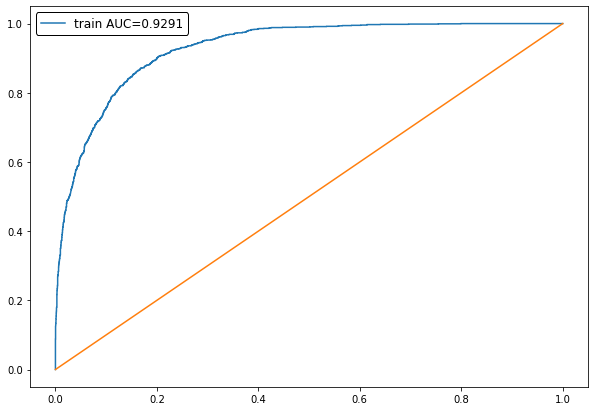

In [149]:
train_auc = roc_auc_score(y, y_train_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [150]:
from google.colab import files
pd.DataFrame(y_test_predicted, columns=['Churn']).to_csv('file3.csv')
files.download('file3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [188]:
parameters = {'n_estimators' : np.arange(10, 50, 1),
              'learning_rate' : np.logspace(-3, -1, 10, base=10)}

In [189]:
xgboosting_model = xgboost.XGBClassifier()
clf = GridSearchCV(xgboosting_model, parameters,
                   cv=5,
                   scoring='roc_auc', refit=True)

In [190]:
clf.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': array([0.001     , 0.0016681 , 0.00278256, 0.00464159, 0.00774264,
       0.0129155 , 0.02154435, 0.03593814, 0.05994843, 0.1       ]),
                         'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])},
             scoring='roc_auc')

In [191]:
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 45}

In [182]:
best_n_estim = clf.best_params_['n_estimators']
best_learn_rate = clf.best_params_['learning_rate']

In [183]:
best_n_estim, best_learn_rate

(45, 0.1)

In [184]:
xgboosting_model = xgboost.XGBClassifier(n_estimators=best_n_estim, learning_rate=best_learn_rate)

xgboosting_model.fit(X_scaled, y)

y_train_predicted = xgboosting_model.predict_proba(X_scaled)[:, 1]
y_test_predicted = xgboosting_model.predict_proba(scaler.transform(X_test))[:, 1]

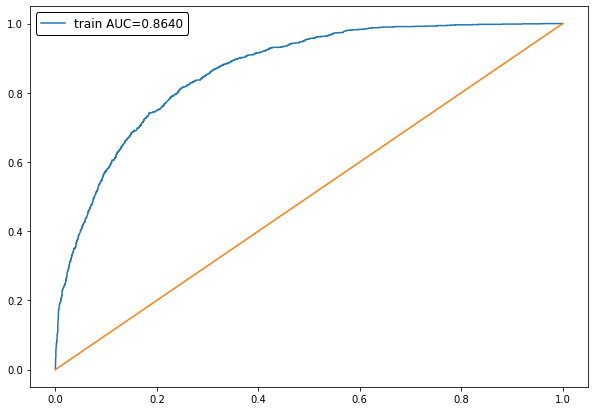

In [185]:
train_auc = roc_auc_score(y, y_train_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [186]:
y_test_predicted

array([0.05638922, 0.54759324, 0.67979956, ..., 0.7951186 , 0.5725136 ,
       0.02115777], dtype=float32)

Неплохой результат, подойдёт для попытки на каггл

In [187]:
from google.colab import files
pd.DataFrame(y_test_predicted, columns=['Churn']).to_csv('file5.csv')
files.download('file5.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>